In [ ]:
import tensorflow as tf
import numpy as np
import pickle
import pandas as pd


from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Flatten, Dense, SimpleRNN, BatchNormalization,UpSampling2D, LSTM, Conv1D, Conv2D , Embedding, GRU, GlobalAveragePooling1D, GlobalAveragePooling2D, MaxPooling1D, MaxPooling2D, Dropout
from tensorflow.keras.metrics import mean_squared_error


In [ ]:
google = True

if google:
    from google.colab import drive 
    drive.mount('/content/gdrive')
    path = "gdrive/MyDrive/"
else:
    path = ""

Mounted at /content/gdrive


In [ ]:
#Loading data
with open(path + 'time_series_1.pickle', 'rb') as f:
    time_series_1 = pickle.load(f)
with open(path + 'time_series_2.pickle', 'rb') as f:
    time_series_2 = pickle.load(f)
with open(path + 'y.pickle', 'rb') as f:
    y = pickle.load(f)

### Following sectoin of the code is a preprocessing section

In [ ]:
type(time_series_1)

numpy.ndarray

In [ ]:
print(np.count_nonzero(np.isnan(time_series_1)),
      np.count_nonzero(np.isnan(time_series_2)),
      np.count_nonzero(np.isnan(y)))

0 0 0


In [ ]:
type(y[0])

numpy.float64

In [ ]:
# Get occurrences of each element in y
occurrences = np.bincount(y)
occurrences

array([1000, 1000, 1000, 1000])

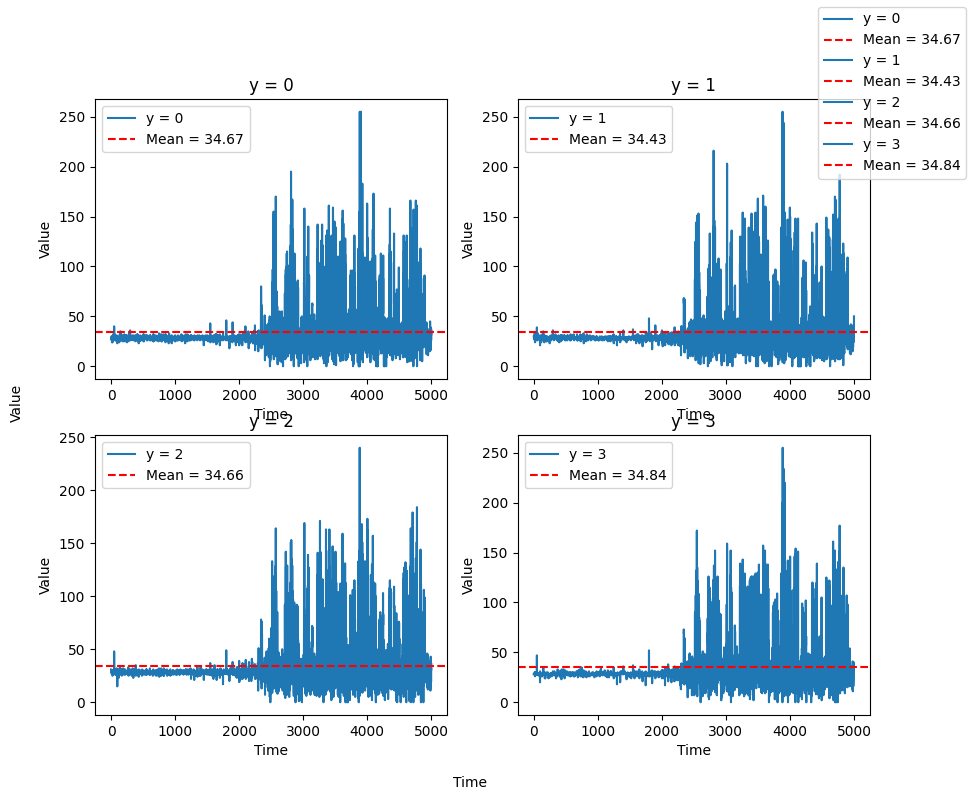

In [ ]:


# Find the indices of the first occurrence of each unique value of y
y_values = [0, 1, 2, 3]
y_first_indices = [np.where(y == y_val)[0][0] for y_val in y_values]

# Create a 2x2 subplot grid
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot the time series for each value of y at the first occurrence in a separate subplot
for i, (y_val, y_first_index) in enumerate(zip(y_values, y_first_indices)):
    row, col = divmod(i, 2)  # Calculate the row and column indices for the current subplot
    data = time_series_1[y_first_index]
    mean = np.mean(data)
    axs[row, col].plot(data, label=f"y = {y_val}")  # Plot the time series
    axs[row, col].axhline(mean, color="red", linestyle="--", label=f"Mean = {mean:.2f}")  # Plot the mean line
    axs[row, col].set_title(f"y = {y_val}")  # Set the title for the subplot

    # Add axis labels and a legend to the subplot
    axs[row, col].set_xlabel("Time")
    axs[row, col].set_ylabel("Value")
    axs[row, col].legend()

# Add axis labels and a legend to the overall figure
fig.text(0.5, 0.02, "Time", ha="center")
fig.text(0.04, 0.5, "Value", va="center", rotation="vertical")
fig.legend()

# Show the plot
plt.show()



In [ ]:
type(y)

numpy.ndarray

In [ ]:

y_values = [0, 1, 2, 3]
data_by_y = [time_series_1[y == y_val] for y_val in y_values]

In [ ]:
print(data_by_y[0].shape,data_by_y[1].shape,data_by_y[2].shape,data_by_y[3].shape,)

(1000, 5000) (1000, 5000) (1000, 5000) (1000, 5000)


In [ ]:
data_by_y[0]

array([[27, 27, 27, ..., 31, 36, 27],
       [29, 29, 29, ..., 39, 29, 32],
       [27, 28, 29, ..., 39, 30, 17],
       ...,
       [29, 29, 29, ..., 27, 26, 18],
       [31, 31, 31, ..., 37, 33, 24],
       [31, 31, 31, ..., 32, 28, 27]], dtype=uint8)

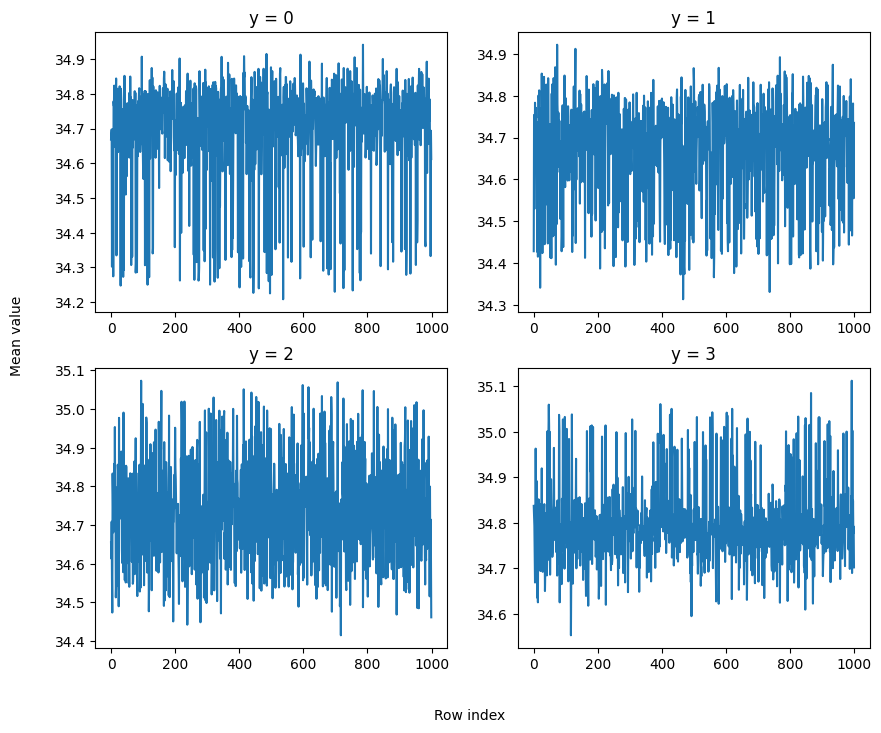

In [ ]:
# Compute the mean of each row for each of the 4 arrays
means_by_y = [np.mean(data_by_y[i], axis=1) for i in range(4)]

# Create a 2x2 subplot grid
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot the mean values for each array in a separate subplot
for i, mean_values in enumerate(means_by_y):
    row, col = divmod(i, 2)  # Calculate the row and column indices for the current subplot
    axs[row, col].plot(mean_values)  # Plot the mean values
    axs[row, col].set_title(f"y = {y_values[i]}")  # Set the title for the subplot

# Add axis labels
fig.text(0.5, 0.02, "Row index", ha="center")
fig.text(0.04, 0.5, "Mean value", va="center", rotation="vertical")

# Show the plot
plt.show()


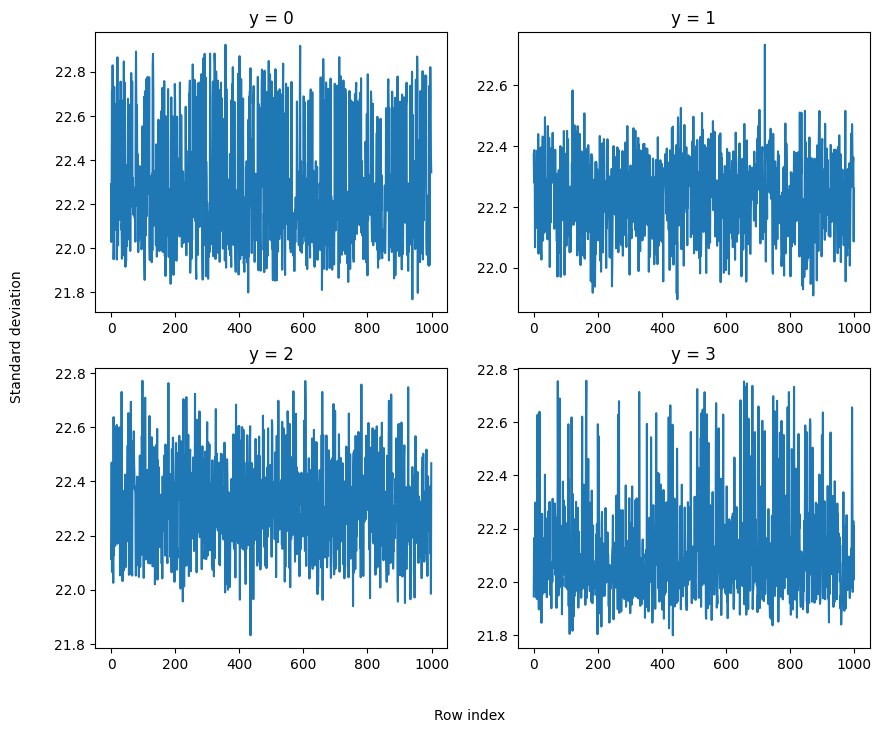

In [ ]:
# Compute the standard deviation of each row for each of the 4 arrays
stds_by_y = [np.std(data_by_y[i], axis=1) for i in range(4)]

# Create a 2x2 subplot grid
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot the standard deviation values for each array in a separate subplot
for i, std_values in enumerate(stds_by_y):
    row, col = divmod(i, 2)  # Calculate the row and column indices for the current subplot
    axs[row, col].plot(std_values)  # Plot the standard deviation values
    axs[row, col].set_title(f"y = {y_values[i]}")  # Set the title for the subplot

# Add axis labels
fig.text(0.5, 0.02, "Row index", ha="center")
fig.text(0.04, 0.5, "Standard deviation", va="center", rotation="vertical")

# Show the plot
plt.show()


In [ ]:
y_values = [0, 1, 2, 3]
data_by_y = [time_series_2[y == y_val] for y_val in y_values]

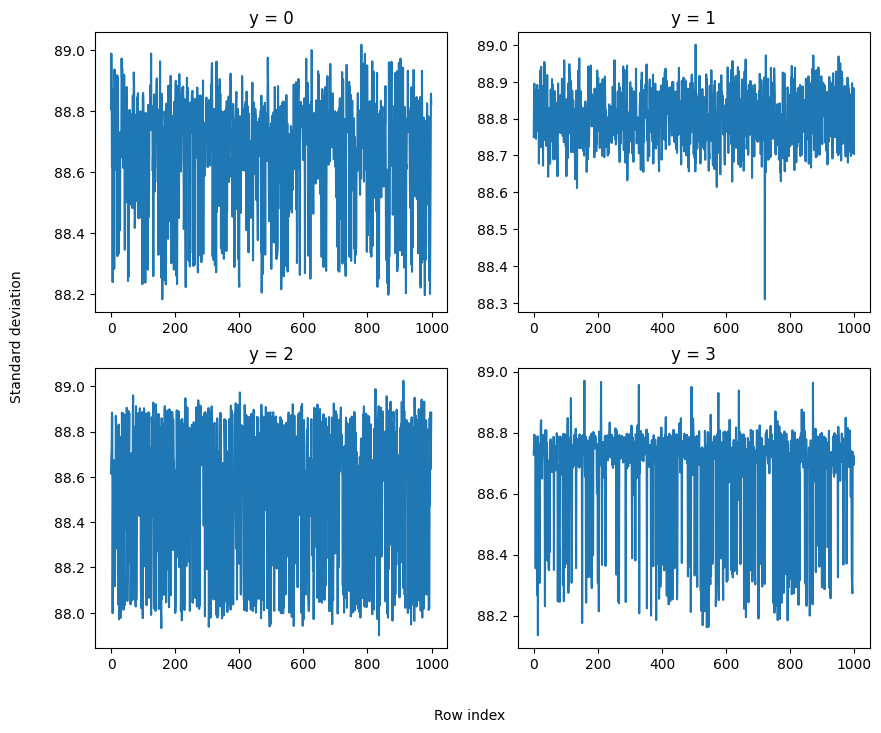

In [ ]:
# Compute the standard deviation of each row for each of the 4 arrays
stds_by_y = [np.std(data_by_y[i], axis=1) for i in range(4)]

# Create a 2x2 subplot grid
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot the standard deviation values for each array in a separate subplot
for i, std_values in enumerate(stds_by_y):
    row, col = divmod(i, 2)  # Calculate the row and column indices for the current subplot
    axs[row, col].plot(std_values)  # Plot the standard deviation values
    axs[row, col].set_title(f"y = {y_values[i]}")  # Set the title for the subplot

# Add axis labels
fig.text(0.5, 0.02, "Row index", ha="center")
fig.text(0.04, 0.5, "Standard deviation", va="center", rotation="vertical")

# Show the plot
plt.show()

In [1]:
# although the plot of means are not so distinguishable, the variance plots shows clear distinguishable 
#pattern between faulty  and non faulty type observations.


#### 1. Discuss what type of sequence prediction approach (sequence-to-vector, sequence-tosequence, or encoder-decoder) is most sensible to predict the operating mode of a turbine based on the two sensor reading time series. Also describe what data shape you need to use for your chosen approach.

####        
  To predict the operating mode of a turbine based on the time series data from two sensors, a sequence-to-vector approach would be the most sensible. In this approach, the input sequence (sensor readings) is encoded into a fixed-length vector, which is then fed into a classifier to predict the operating mode.

For this approach, the data shape needed would be (4000, 5000, 2), where 4000 is the number of turbine runs, 5000 is the number of time steps in each run, and 2 represents the two sensors (pitch angle and generator torque). The input to the sequence-to-vector model would be a tensor of shape (4000, 5000, 2), and the output would be a tensor of shape (4000, 4), where 4 represents the four operating modes (0-healthy, 1-generator torque faulty, 2-pitch angle faulty, 3-both faulty).
To predict the operating mode of a turbine based on the time series data from two sensors, a sequence-to-vector approach would be the most sensible. In this approach, the input sequence (sensor readings) is encoded into a fixed-length vector, which is then fed into a classifier to predict the operating mode.

For this approach, the data shape needed would be (4000, 5000, 2), where 4000 is the number of turbine runs, 5000 is the number of time steps in each run, and 2 represents the two sensors (pitch angle and generator torque). The input to the sequence-to-vector model would be a tensor of shape (4000, 5000, 2), and the output would be a tensor of shape (4000, 4), where 4 represents the four operating modes (0-healthy, 1-generator torque faulty, 2-pitch angle faulty, 3-both faulty).
An encoder-decoder model is typically used for tasks such as language translation or text summarization, where the input and output sequences have different lengths and may have different meanings. In the case of predicting the operating mode of a wind turbine based on sensor readings, the input and output sequences have the same length (5000) and the output has a fixed meaning (one of four operating modes).

Additionally, an encoder-decoder model typically requires a large amount of training data to learn the mapping between input and output sequences, and the available dataset in this case may not be large enough to train such a model effectively.

Therefore, a sequence-to-vector approach, where the input sequence is encoded into a fixed-length vector, is a more sensible choice for this task.
  
  Also, the output will be different between a sequence-to-sequence and sequence-to-vector approach using RNNs. In a sequence-to-sequence approach, the output at each time step is fed back into the model as input at the next time step, allowing the model to capture dependencies across the entire sequence. In contrast, a sequence-to-vector approach only uses the final output of the RNN to make a prediction for the entire sequence, potentially losing some of the temporal dependencies in the process. As a result, the two approaches may have different strengths and weaknesses depending on the specific problem and dataset.


#### 2. Create an iterator (ideally, a tensorflow.data.Dataset) that produces batches of data formatted in the appropriate way for your chosen approach.

In [ ]:
# y label should be interger type and it was float 32 type as chhecked earlier
y = y.astype(int)


In [ ]:
# there are two features at play here in the timeseries namely pitch angle for timeseries 1 and torque for 2. 
# so in this step, they were combined with tf.stack functionality to join them in  a single tensor
stacked_series = np.stack([time_series_1, time_series_2], axis=-1)

#creating training (80%), validation (10%) and test set (10%)

x_train, x_other, y_train, y_others = train_test_split(stacked_series, y, train_size=0.7, random_state = 341)
x_valid, x_test, y_valid, y_test = train_test_split(x_other, y_others, train_size=0.5,random_state = 341 )

#checking the shape of the data sets

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_valid.shape)
print(y_valid.shape)

(2800, 5000, 2)
(2800,)
(600, 5000, 2)
(600,)
(600, 5000, 2)
(600,)


In [ ]:

def std_tf(series):
    

    # Convert the input tensor to float32 as not doing that was giving error because of data type 
    series = tf.cast(series, tf.float64) # to make divisible

    # Compute the mean and variance of the data
    mean, variance = tf.nn.moments(series, axes=[0])

    # Standardize the data using the computed mean and variance
    series_standardized = tf.nn.batch_normalization(
        series, mean=mean, variance=variance, offset=None, scale=None, variance_epsilon=1e-6
    )

    return series_standardized

#It is not necessary to standardize the time series data before using them with TensorFlow.
#However, standardization can sometimes be beneficial as it can help with the convergence of the optimization algorithm 
#and can improve the performance of the model. Standardization can also help ensure that different features are on the same scale,
# which can help avoid issues such as vanishing gradients during training. 
#Therefore, it is often a good practice to standardize the data before using it in a machine learning model.

In [ ]:
#standardizing the train, test and validation
x_train=std_tf(x_train)
x_valid=std_tf(x_valid)
x_test=std_tf(x_test)

In [ ]:
type(x_train)

tensorflow.python.framework.ops.EagerTensor

In [ ]:
#settig the seed to reproducing  same result
np.random.seed(149)
tf.random.set_seed(149)


# Define batch size and buffer size for shuffling
batch_size = 32
buffer_size = len(x_train)

# Q2 specific: defining a tenssorflow dataset

train= tf.data.Dataset.from_tensor_slices((x_train, y_train))
val = tf.data.Dataset.from_tensor_slices((x_valid, y_valid))
test = tf.data.Dataset.from_tensor_slices((x_test, y_test))

# Shuffle and batch the datasets

train = train.shuffle(buffer_size=buffer_size)
train = train.batch(batch_size)
train = train.prefetch(tf.data.AUTOTUNE)

val = val.batch(batch_size)
val = val.prefetch(tf.data.AUTOTUNE)

test = test.batch(batch_size)
test = test.prefetch(tf.data.AUTOTUNE)


In [ ]:
#Checking the shape of the inputs

for item in train:
    print("x-shape: " + str(item[0].shape) + " | y-shape:" + str(item[1].shape))
    break

x-shape: (32, 100, 100, 1) | y-shape:(32,)


#### 3. Create a neural network in TensorFlow to predict the operating mode of a wind turbine based on the sensor data. Make sure that you try out different layers and elements discussed in class, such as Dense, SimpleRNN, GRU, and Conv1D.

In [ ]:
# as the data is equally distributed, predicting 3 for example for all observations will get us 25% and that can be the first base point

### baseline neural network: feedforward type

In [ ]:
timesteps= 5000
features = 2 
model_onlydense = tf.keras.Sequential([
    tf.keras.Input(shape=(timesteps, features)),
    Flatten(),
    Dense(32, activation="relu"),
    Dense(16, activation="relu"),
    Dense(8, activation="relu"),
    Dense(4, activation = 'softmax')
])
model_onlydense.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 10000)             0         
                                                                 
 dense_15 (Dense)            (None, 32)                320032    
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dense_17 (Dense)            (None, 8)                 136       
                                                                 
 dense_18 (Dense)            (None, 4)                 36        
                                                                 
Total params: 320,732
Trainable params: 320,732
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#defining a function to train the models in subsesequent sections
def model_train(model, modelname="model.h5",epochs=30 ):
    checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(modelname, save_best_only=True)
    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model with validation
    history = model.fit(train,
                        epochs=epochs,
                        validation_data=val,
                        callbacks=[checkpoint_cb])
    return history, modelname


In [ ]:
# training the feedforward model
history,onlydense=model_train(model_onlydense,"onlydense.h5",30)

Epoch 1/30
88/88 [==============================] - 7s 7ms/step - loss: 0.4533 - accuracy: 0.8193 - val_loss: 0.2493 - val_accuracy: 0.8900
Epoch 2/30
88/88 [==============================] - 0s 5ms/step - loss: 0.2266 - accuracy: 0.8993 - val_loss: 0.2544 - val_accuracy: 0.8750
Epoch 3/30
88/88 [==============================] - 0s 5ms/step - loss: 0.1825 - accuracy: 0.9214 - val_loss: 0.2750 - val_accuracy: 0.8567
Epoch 4/30
88/88 [==============================] - 0s 5ms/step - loss: 0.1422 - accuracy: 0.9421 - val_loss: 0.3252 - val_accuracy: 0.8600
Epoch 5/30
88/88 [==============================] - 0s 5ms/step - loss: 0.0958 - accuracy: 0.9607 - val_loss: 0.5560 - val_accuracy: 0.8833
Epoch 6/30
88/88 [==============================] - 1s 6ms/step - loss: 0.0773 - accuracy: 0.9729 - val_loss: 0.5175 - val_accuracy: 0.8600
Epoch 7/30
88/88 [==============================] - 1s 8ms/step - loss: 0.0602 - accuracy: 0.9821 - val_loss: 0.5746 - val_accuracy: 0.8867
Epoch 8/30
88/88 [==

In [ ]:
# defining a function to get the plots and test evaluation parameters 
# as well as to download each model
def evaluate_model( history,test_data,val_data, model_path):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Plot training & validation accuracy values
    ax1.plot(history.history['accuracy'], color='yellow')
    ax1.plot(history.history['val_accuracy'], color='blue')
    ax1.set_title('Model accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    ax2.plot(history.history['loss'], color='orange')
    ax2.plot(history.history['val_loss'], color='green')
    ax2.set_title('Model loss')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'], loc='upper left')

    plt.show()
    model = tf.keras.models.load_model(model_path)
    test_loss, test_accuracy = model.evaluate(test_data)
    val_loss, val_accuracy=model.evaluate(val_data)
    print('Test loss:', test_loss)
    print('Test accuracy:', test_accuracy)
    
    # Save the model
    model.save(model_path)
    
    
    if google:
      from google.colab import files
      files.download(model_path)
    else:
        model.save(model_path)

    
    
    return {'model_path': model_path,
            'test_loss': test_loss,
            'test_accuracy': test_accuracy,
            'val_loss': val_loss,
            'val_accuracy': val_accuracy}


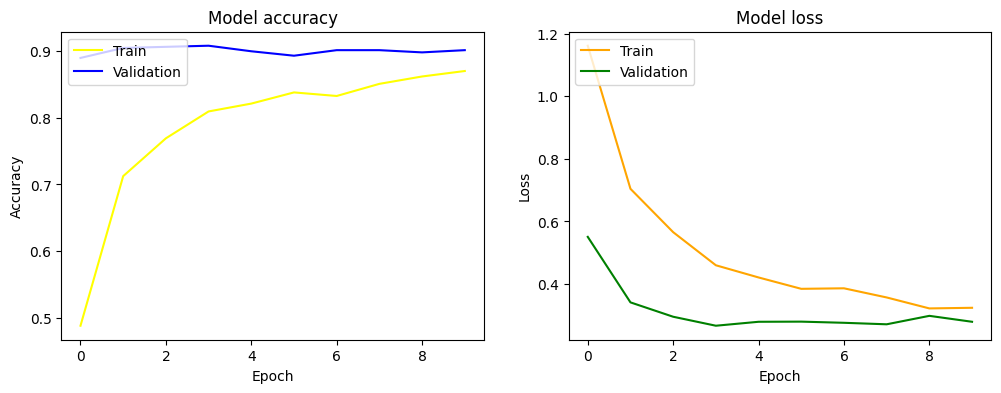

19/19 [==============================] - 0s 4ms/step - loss: 0.2493 - accuracy: 0.8900
Test loss: 0.24975837767124176
Test accuracy: 0.8883333206176758


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# intiate a blank lost to store data
results = []
#applying the function to get the desired results
test_results= evaluate_model( history,test,val, onlydense)
results.append(test_results)

#### simpleRNN with FNN(fully connected layers)

In [ ]:
input= tf.keras.layers.Input(shape=(5000, 2))

x = SimpleRNN(units=64)(input)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(4, activation='softmax')(x)
model_srnn = tf.keras.Model(inputs=input, outputs=output)
model_srnn.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 5000, 2)]         0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                4288      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 4)                 132       
                                                                 
Total params: 10,660
Trainable params: 10,660
Non-trainable p

In [ ]:
#training the model

history,srnn=model_train(model_srnn,"model_srnn.h5",10)

Epoch 1/10
88/88 [==============================] - 303s 3s/step - loss: 1.2559 - accuracy: 0.4064 - val_loss: 1.0686 - val_accuracy: 0.5667
Epoch 2/10
88/88 [==============================] - 331s 4s/step - loss: 1.0183 - accuracy: 0.5650 - val_loss: 0.8840 - val_accuracy: 0.6533
Epoch 3/10
88/88 [==============================] - 291s 3s/step - loss: 0.8641 - accuracy: 0.6482 - val_loss: 0.7538 - val_accuracy: 0.7550
Epoch 4/10
88/88 [==============================] - 289s 3s/step - loss: 0.7446 - accuracy: 0.7043 - val_loss: 0.6634 - val_accuracy: 0.7717
Epoch 5/10
88/88 [==============================] - 292s 3s/step - loss: 0.6421 - accuracy: 0.7446 - val_loss: 0.5733 - val_accuracy: 0.7983
Epoch 6/10
88/88 [==============================] - 283s 3s/step - loss: 0.5662 - accuracy: 0.7782 - val_loss: 0.5297 - val_accuracy: 0.8033
Epoch 7/10
88/88 [==============================] - 283s 3s/step - loss: 0.5120 - accuracy: 0.7989 - val_loss: 0.4781 - val_accuracy: 0.8200
Epoch 8/10
88

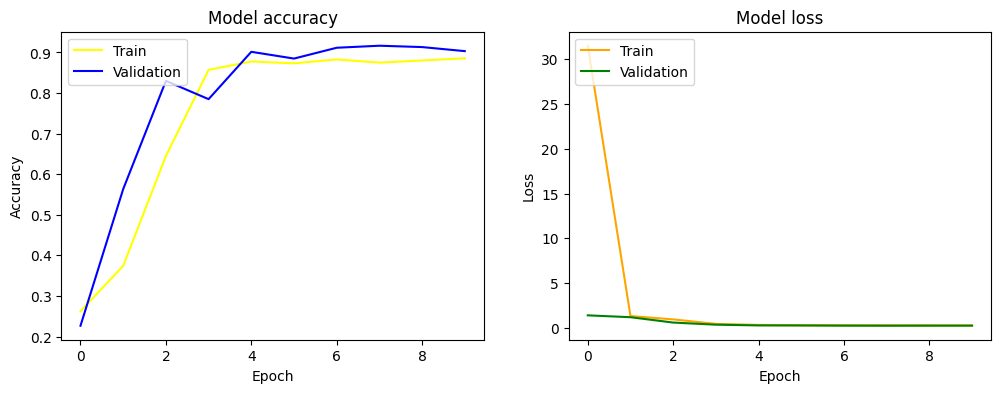

19/19 [==============================] - 8s 431ms/step - loss: 0.4343 - accuracy: 0.8367
Test loss: 0.43888041377067566
Test accuracy: 0.8216666579246521


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# evaluation of test parameters
test_results= evaluate_model( history,test,val, srnn)
results.append(test_results)


#### Trying 2 GRU layers and 2 dense layers 


In [ ]:
# deifing the model
input = tf.keras.layers.Input(shape=(timesteps, features))
x = tf.keras.layers.GRU(32, return_sequences=True)(input)
x = tf.keras.layers.GRU(32)(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
output = tf.keras.layers.Dense(4, activation='softmax')(x)

model_gru = tf.keras.Model(inputs=input, outputs=output)
model_gru.summary()



Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 5000, 2)]         0         
                                                                 
 gru (GRU)                   (None, 5000, 32)          3456      
                                                                 
 gru_1 (GRU)                 (None, 32)                6336      
                                                                 
 dense_7 (Dense)             (None, 32)                1056      
                                                                 
 dense_8 (Dense)             (None, 4)                 132       
                                                                 
Total params: 10,980
Trainable params: 10,980
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#training the model
history,GRU_2=model_train(model_gru,"model_GRU.h5",10)

Epoch 1/10
88/88 [==============================] - 25s 222ms/step - loss: 1.3543 - accuracy: 0.3543 - val_loss: 1.3353 - val_accuracy: 0.3533
Epoch 2/10
88/88 [==============================] - 19s 212ms/step - loss: 1.3157 - accuracy: 0.3836 - val_loss: 1.2944 - val_accuracy: 0.3850
Epoch 3/10
88/88 [==============================] - 20s 228ms/step - loss: 1.2536 - accuracy: 0.4207 - val_loss: 1.2306 - val_accuracy: 0.4150
Epoch 4/10
88/88 [==============================] - 19s 213ms/step - loss: 1.1625 - accuracy: 0.4779 - val_loss: 1.1286 - val_accuracy: 0.4883
Epoch 5/10
88/88 [==============================] - 20s 226ms/step - loss: 1.0763 - accuracy: 0.5164 - val_loss: 1.0469 - val_accuracy: 0.5117
Epoch 6/10
88/88 [==============================] - 19s 212ms/step - loss: 1.0200 - accuracy: 0.5561 - val_loss: 0.9985 - val_accuracy: 0.5383
Epoch 7/10
88/88 [==============================] - 20s 223ms/step - loss: 0.9714 - accuracy: 0.5704 - val_loss: 0.9571 - val_accuracy: 0.5783

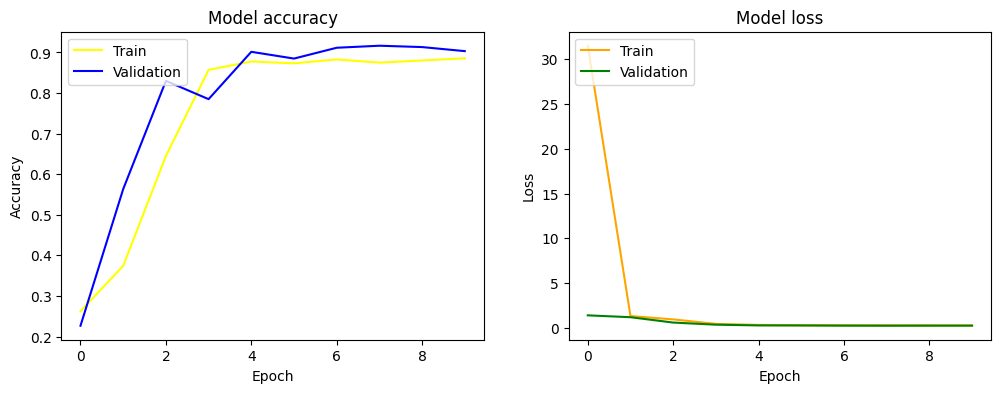

19/19 [==============================] - 2s 90ms/step - loss: 0.8499 - accuracy: 0.6483
Test loss: 0.8597075343132019
Test accuracy: 0.6449999809265137


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#evaluation of test parameters
test_results= evaluate_model( history,test,val, GRU_2)
results.append(test_results)


In [ ]:
#model combination using Convolution, pooling, GRU, convolution, pooling, and 2 FNNs, inspired by the paper mentioned in the question  
input = tf.keras.layers.Input(shape=(timesteps, features))

CNN_1 = tf.keras.layers.Conv1D(filters=64, kernel_size=5, activation='relu')(input)
P_1=MaxPooling1D(2)(CNN_1)
G_1 = tf.keras.layers.GRU(units=64, return_sequences=True)(P_1)
CNN_1 = tf.keras.layers.Conv1D(filters=32, kernel_size=5, activation='relu')(G_1)
P_2=MaxPooling1D(2)(CNN_1)

Flat = tf.keras.layers.Flatten()(P_2)

Dense_1 = tf.keras.layers.Dense(units=64, activation='relu')(Flat)
Dp_1 = tf.keras.layers.Dropout(rate=0.5)(Dense_1)
Dense_2 = tf.keras.layers.Dense(units=16, activation='relu')(Dp_1)
Dp_2 = tf.keras.layers.Dropout(rate=0.5)(Dense_2)
output = tf.keras.layers.Dense(units=4, activation='softmax')(Dp_2)

model_combo = tf.keras.Model(inputs=input, outputs=output)

model_combo.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 5000, 2)]         0         
                                                                 
 conv1d_8 (Conv1D)           (None, 4996, 64)          704       
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 2498, 64)         0         
 1D)                                                             
                                                                 
 gru_4 (GRU)                 (None, 2498, 64)          24960     
                                                                 
 conv1d_9 (Conv1D)           (None, 2494, 32)          10272     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 1247, 32)         0         
 1D)                                                       

In [ ]:
#training the model
history,combo_gru=model_train(model_combo,"model_combo_1.h5",10)


Epoch 1/10
88/88 [==============================] - 12s 84ms/step - loss: 1.1611 - accuracy: 0.4879 - val_loss: 0.5507 - val_accuracy: 0.8900
Epoch 2/10
88/88 [==============================] - 7s 85ms/step - loss: 0.7041 - accuracy: 0.7125 - val_loss: 0.3415 - val_accuracy: 0.9050
Epoch 3/10
88/88 [==============================] - 7s 78ms/step - loss: 0.5657 - accuracy: 0.7693 - val_loss: 0.2956 - val_accuracy: 0.9067
Epoch 4/10
88/88 [==============================] - 7s 78ms/step - loss: 0.4600 - accuracy: 0.8096 - val_loss: 0.2669 - val_accuracy: 0.9083
Epoch 5/10
88/88 [==============================] - 7s 84ms/step - loss: 0.4211 - accuracy: 0.8214 - val_loss: 0.2795 - val_accuracy: 0.9000
Epoch 6/10
88/88 [==============================] - 7s 76ms/step - loss: 0.3848 - accuracy: 0.8382 - val_loss: 0.2800 - val_accuracy: 0.8933
Epoch 7/10
88/88 [==============================] - 7s 84ms/step - loss: 0.3864 - accuracy: 0.8329 - val_loss: 0.2763 - val_accuracy: 0.9017
Epoch 8/10
8

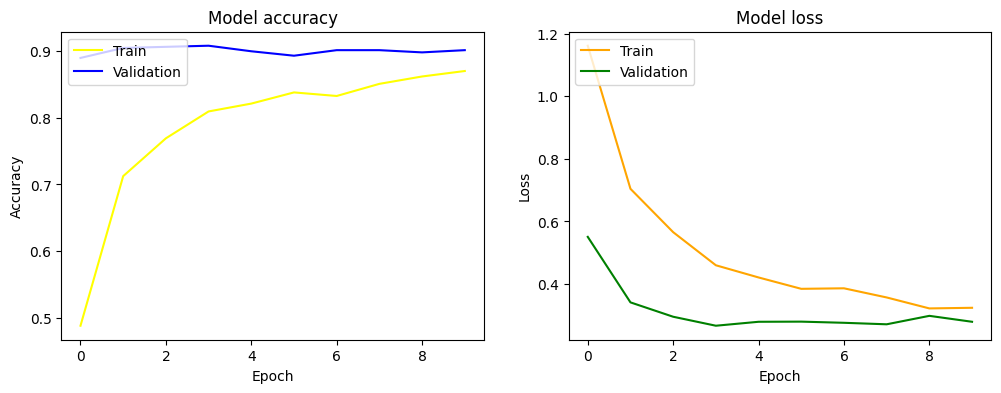

19/19 [==============================] - 1s 34ms/step - loss: 0.2669 - accuracy: 0.9083
Test loss: 0.22961273789405823
Test accuracy: 0.9016666412353516


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#ebaluation of test parameters
test_results= evaluate_model( history,test,val, combo_gru)
results.append(test_results)


In [ ]:
# Trying a similar model, this time with 2Conv1D layers + 2 LSTM layers
# and a dense layer 
input = tf.keras.layers.Input(shape=(timesteps, features))
model_LSTM = tf.keras.Sequential([
    tf.keras.Input(shape=(timesteps, features)),
    tf.keras.layers.Conv1D(filters=32,kernel_size=3,), #20 filters in each convolutional layer
    tf.keras.layers.Conv1D(filters=16,kernel_size=3,),
    tf.keras.layers.LSTM(64, return_sequences = True,activation = "tanh"),
    tf.keras.layers.LSTM(64, activation = "tanh"),
    tf.keras.layers.Dense(4,activation='softmax')
    ])
model_LSTM.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 4998, 32)          224       
                                                                 
 conv1d_5 (Conv1D)           (None, 4996, 16)          1552      
                                                                 
 lstm_2 (LSTM)               (None, 4996, 64)          20736     
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_14 (Dense)            (None, 4)                 260       
                                                                 
Total params: 55,796
Trainable params: 55,796
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#training the model
history,combo_LSTM=model_train(model_LSTM,"model_combo_LSTM.h5",10)


Epoch 1/10
88/88 [==============================] - 28s 273ms/step - loss: 1.3567 - accuracy: 0.3389 - val_loss: 1.3407 - val_accuracy: 0.3533
Epoch 2/10
88/88 [==============================] - 23s 264ms/step - loss: 1.2518 - accuracy: 0.4293 - val_loss: 1.2068 - val_accuracy: 0.4700
Epoch 3/10
88/88 [==============================] - 23s 263ms/step - loss: 1.0599 - accuracy: 0.5393 - val_loss: 1.0374 - val_accuracy: 0.5533
Epoch 4/10
88/88 [==============================] - 23s 257ms/step - loss: 0.9284 - accuracy: 0.6207 - val_loss: 0.9996 - val_accuracy: 0.5700
Epoch 5/10
88/88 [==============================] - 32s 370ms/step - loss: 0.8041 - accuracy: 0.6725 - val_loss: 0.8697 - val_accuracy: 0.6500
Epoch 6/10
88/88 [==============================] - 25s 286ms/step - loss: 0.6919 - accuracy: 0.7275 - val_loss: 0.7840 - val_accuracy: 0.6917
Epoch 7/10
88/88 [==============================] - 23s 263ms/step - loss: 0.5921 - accuracy: 0.7675 - val_loss: 0.7779 - val_accuracy: 0.7183

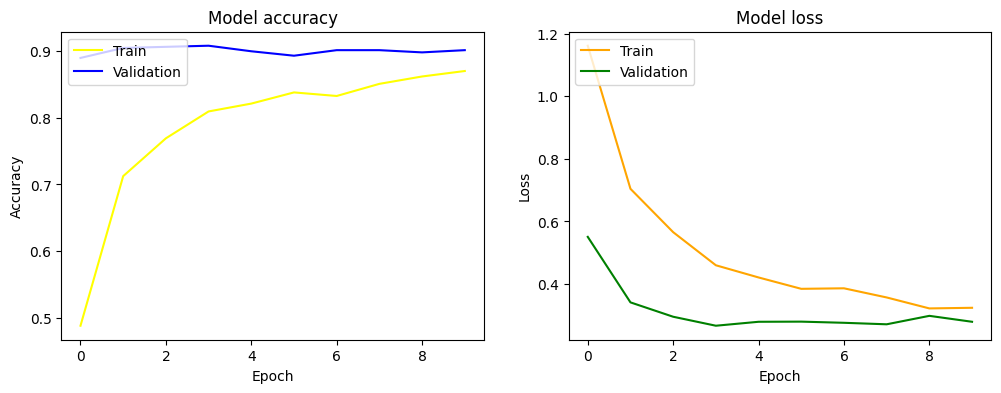

19/19 [==============================] - 2s 108ms/step - loss: 0.6793 - accuracy: 0.7500
Test loss: 0.670910120010376
Test accuracy: 0.7433333396911621


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#evaluating test parameters
test_results= evaluate_model( history,test,val, combo_LSTM)
results.append(test_results)

#### Q4.4. We have come across Conv1D layers as a tool for analyzing time series. Different from recurrent layers such as SimpleRNN, LSTM, or GRU, when we apply a Conv1D layer to a part of a sequence, the operation does not depend on the application of the layer to previous parts of the sequence. Discuss in which types of (business) applications Conv1D layers can be particularly useful, and in which you should prefer a recurrent layer.

#### Ans: As per my understanding for the working of the convolutional network, I can note the following points
1. The main idea of convolution is that the convolutional layers are not connected to each of the obeservation points and only focus on the part of the observations within their receptive field by the virtue of the filtering mechanism. So rather than focusing on whole dataset, it can pick out distinguishing features of a dataset or target parameter.
2. **Business application:** : Being mindful of our current case, this kind of usage mentioned above can be useful when one is trying to pick up frequently ocurring patterns, stress signals etc. For example, to detect a particular type of fault signal within the timeseries data from turbine, CNN(convolutional neural network) would be more preferable as they can filter out even all the noises up to a great extent.Also, subsequently it can identify, from which part of the equipment the signal is coming from by backtracking the pattern. In short, for our context, CNNs are more useful for classification and localization  


For RNN(recurrent neural neural network):


1. The main point is to keep the memory of the initial input and RNN does that by feeding back the prediction at time t to the neuron at time t+1 again for the calculation of prediction of t+1. So, a recurrent neuron at time t, receives input at t and the output at t-1 from the previous neuron.
2.**Business application:**:So in our case, it can capture dependencies accross the time horizon effectively and I would prefer RNN based models for prediction tasks. In our context, if we collect the machinary efficiency data based on the signals and wind speed historical data, we can theorictically predict the energy production in future. This can be quite useful based on practical planning requirement such as predicting future energy price etc. In short, the main application is time series forecasting.
3. With respect to our case, if we have long term usage data of turbine components and then we take a different approach of predicting faults based on weather conditions, usage of turbine, frequency of maintanance, wind speed etc with respect to time, then RNNs are more usefule. It is because here time is the target variable and CNN can not use it as a spatial axis anymore so it would become computationally more expensive to make it remember historical association.

#### Q5. 5. In your own words, explain why the approach outlined here can help analyze time-series data and why it might outperform RNNs.

#### Answer:
I can think of following reasons:


1.The task in hand is clearly classification. And based on the logic discussed above, Convolution layers have an advantage because the state of the turbine is the target not the time of fault.

2.Once we have determined that convolution is more useful, it makes one remember that the CNN concept was generated based on how human brain processes images by focusing not on the whole but on the localized features of the images.
And the approach described in the paper essentially preprocesses the data into a grey scale image.

3.Kernels here works as feature extractors and as we are trying to find 2-5% faults in the turbine, these localized patterns are more recognisable with CNN in these processed grey scale observations.

4. The problem that RNNs will face is that it will try to remenber all the historical situations, even the noise in the data. Not only this makes the classification difficult, but also computationally more expensive.

#### Q6.Convert the data for use with a CNN. In particular, following the approach outlined in Scenario 2 (section 5.3 of the paper) and summarized in Figure 18, convert the two time series corresponding to one wind turbine run into a single (100,100,1) array (i.e., a grayscale image).

In [ ]:


## convert time-series to a grey-scale image
num_cat = 4
rows, cols, channels = 100, 100, 1 
ts_1 = time_series_1.reshape(time_series_1.shape[0],100,50,1)
ts_2 = time_series_2.reshape(time_series_2.shape[0],100,50,1)
CNN_image = np.concatenate((ts_1, ts_2), axis=2)
print(CNN_image.shape)
print(y.shape)

(4000, 100, 100, 1)
(4000,)


#### Q7.In TensorFlow, replicate the CNN with three convolutional layers displayed in Figure 12 and train it on your data. Make sure to record your final validation set accuracy

#### Answer: We first make a suitable tensorflow dataset as before and then go with the modelling

In [228]:
#creating new train, test and valid from grayimage
X_train, X_other, Y_train, Y_other = train_test_split(CNN_image, y, test_size = 0.3, random_state=42)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_other, Y_other, test_size = 0.5, random_state=42)

train = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
train = train.shuffle(len(X_train)).batch(32)

val = tf.data.Dataset.from_tensor_slices((X_valid, Y_valid))
val = val.batch(32)

test = tf.data.Dataset.from_tensor_slices((X_test, Y_test))
test = test.batch(32)


train = train.prefetch(tf.data.AUTOTUNE)

val = val.prefetch(tf.data.AUTOTUNE)

test = test.prefetch(tf.data.AUTOTUNE)

In [ ]:
# Defining the CNN architecture as per figure 12
model_3conv_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(100, 100, 1)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=num_cat, activation='softmax')
])

model_3conv_1.summary()



Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 98, 98, 32)        320       
                                                                 
 conv2d_36 (Conv2D)          (None, 96, 96, 32)        9248      
                                                                 
 dropout_23 (Dropout)        (None, 96, 96, 32)        0         
                                                                 
 conv2d_37 (Conv2D)          (None, 94, 94, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 31, 31, 16)       0         
 2D)                                                             
                                                                 
 flatten_13 (Flatten)        (None, 15376)             0         
                                                     

In [ ]:
history,CONV_1=model_train(model_3conv_1, modelname="model_3conv_1.h5",epochs=10 )
    


Epoch 1/10
88/88 [==============================] - 4s 30ms/step - loss: 11.1870 - accuracy: 0.3796 - val_loss: 0.8795 - val_accuracy: 0.7571
Epoch 2/10
88/88 [==============================] - 2s 26ms/step - loss: 0.5066 - accuracy: 0.8111 - val_loss: 0.3088 - val_accuracy: 0.8997
Epoch 3/10
88/88 [==============================] - 3s 29ms/step - loss: 0.3116 - accuracy: 0.8721 - val_loss: 0.2882 - val_accuracy: 0.8265
Epoch 4/10
88/88 [==============================] - 2s 28ms/step - loss: 0.2760 - accuracy: 0.8818 - val_loss: 0.2515 - val_accuracy: 0.8591
Epoch 5/10
88/88 [==============================] - 2s 27ms/step - loss: 0.2671 - accuracy: 0.8729 - val_loss: 0.2455 - val_accuracy: 0.8947
Epoch 6/10
88/88 [==============================] - 2s 26ms/step - loss: 0.2685 - accuracy: 0.8836 - val_loss: 0.2431 - val_accuracy: 0.8865
Epoch 7/10
88/88 [==============================] - 3s 29ms/step - loss: 0.2595 - accuracy: 0.8839 - val_loss: 0.2597 - val_accuracy: 0.8950
Epoch 8/10
8

0.8823529481887817


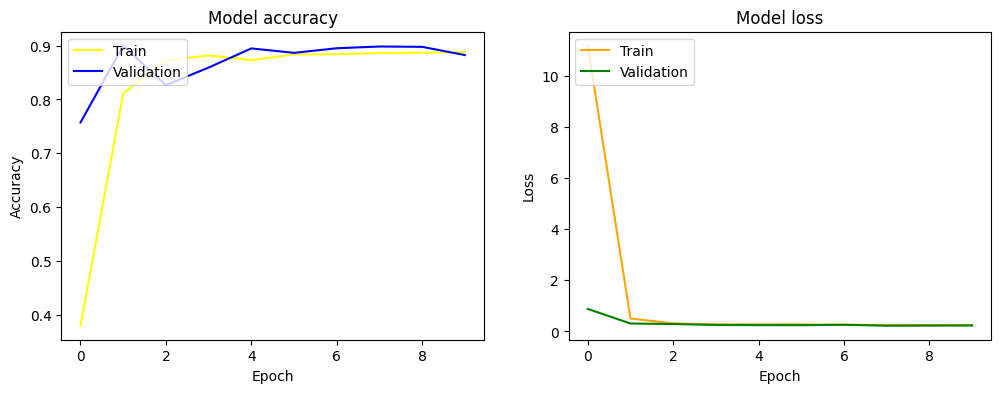

107/107 [==============================] - 1s 5ms/step - loss: 0.2220 - accuracy: 0.8982
Test loss: 0.24312052130699158
Test accuracy: 0.8949999809265137


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Record the final validation set accuracy
final_val_acc = history.history['val_accuracy'][-1]
print(final_val_acc)
test_results= evaluate_model( history,test,val, CONV_1)
results.append(test_results)

#### Q8. Can you do better by adjusting the CNN? Be creative in your design choices (you might also consider pre-trained CNN architectures) and record your final validation set accuracy.

In [ ]:
# Defining the CNN architecture in figure 13 of the paper
# this is our first approach for a better model

model_3conv_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, input_shape=(100, 100, 1)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    tf.keras.layers.Conv2D(filters=16, kernel_size=3),
    tf.keras.layers.MaxPooling2D(pool_size=3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=num_cat, activation='softmax')
]) 

model_3conv_2.summary()


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 98, 98, 128)       1280      
                                                                 
 conv2d_29 (Conv2D)          (None, 96, 96, 64)        73792     
                                                                 
 dropout_17 (Dropout)        (None, 96, 96, 64)        0         
                                                                 
 conv2d_30 (Conv2D)          (None, 94, 94, 32)        18464     
                                                                 
 conv2d_31 (Conv2D)          (None, 92, 92, 16)        4624      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 16)       0         
 2D)                                                             
                                                     

In [ ]:
history,CONV_2=model_train(model_3conv_2, modelname="model_3conv_2.h5",epochs=10 )
    


Epoch 1/10
88/88 [==============================] - 8s 70ms/step - loss: 0.4323 - accuracy: 0.8364 - val_loss: 0.2874 - val_accuracy: 0.9017
Epoch 2/10
88/88 [==============================] - 6s 68ms/step - loss: 0.3236 - accuracy: 0.8736 - val_loss: 0.2607 - val_accuracy: 0.8933
Epoch 3/10
88/88 [==============================] - 6s 69ms/step - loss: 0.2639 - accuracy: 0.8900 - val_loss: 0.2311 - val_accuracy: 0.9050
Epoch 4/10
88/88 [==============================] - 6s 68ms/step - loss: 0.2737 - accuracy: 0.8779 - val_loss: 0.4281 - val_accuracy: 0.8800
Epoch 5/10
88/88 [==============================] - 6s 68ms/step - loss: 0.2785 - accuracy: 0.8782 - val_loss: 0.2988 - val_accuracy: 0.9117
Epoch 6/10
88/88 [==============================] - 6s 68ms/step - loss: 0.2653 - accuracy: 0.8818 - val_loss: 0.2835 - val_accuracy: 0.9067
Epoch 7/10
88/88 [==============================] - 6s 69ms/step - loss: 0.2497 - accuracy: 0.8879 - val_loss: 0.2309 - val_accuracy: 0.9133
Epoch 8/10
88

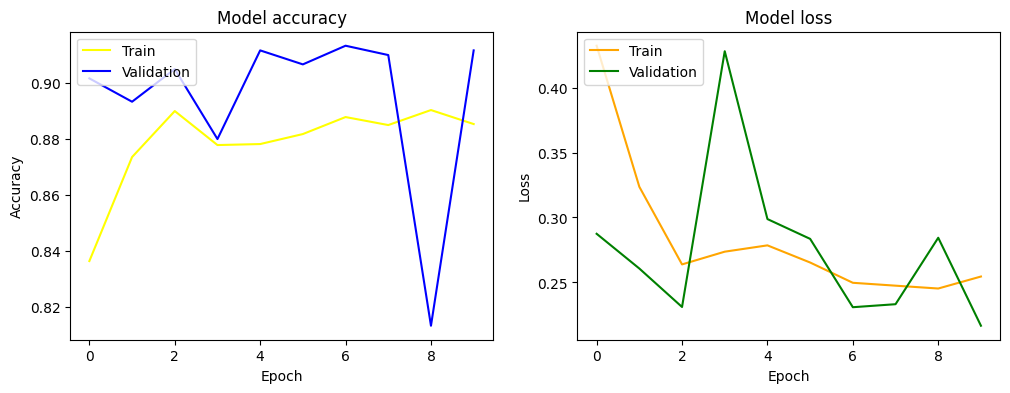

19/19 [==============================] - 0s 17ms/step - loss: 0.2166 - accuracy: 0.9117
Test loss: 0.2349386364221573
Test accuracy: 0.8949999809265137


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
test_results= evaluate_model( history,test,val, CONV_2)
results.append(test_results)

In [229]:
## for pretrained model I choosed two models shown in tutorials, mobilenet and xception

In [ ]:
X_train_1= np.repeat(X_train,3,axis=-1)
X_test_1= np.repeat(X_test,3,axis=-1)
X_val_1= np.repeat(X_valid,3,axis=-1)


In [ ]:
x_preprocess_train = preprocess_input(X_train_1.copy())
x_preprocess_test = preprocess_input(X_test_1.copy())
x_preprocess_val = preprocess_input(X_val_1.copy())
print(x_preprocess_train.shape)
print(x_preprocess_test.shape)
print(x_preprocess_val.shape)


(2800, 100, 100, 3)
(600, 100, 100, 3)
(600, 100, 100, 3)


In [230]:
#importing the model
from tensorflow.keras.applications.mobilenet import MobileNet,preprocess_input

In [ ]:
# setting parameters as non trainable at first
mobilenet = MobileNet(weights='imagenet', include_top=False, input_shape = (100,100,3))
mobilenet.trainable = False

17225924/17225924 [==============================] - 1s 0us/step


In [ ]:
# defining model architecture with case based layers at the end
model = tf.keras.Sequential([
    mobilenet,
    GlobalAveragePooling2D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='sigmoid')
])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 3, 3, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_22 (Dense)            (None, 64)                65600     
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_23 (Dense)            (None, 4)                 260       
                                                                 
Total params: 3,294,724
Trainable params: 65,860
Non-t

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'], 
              optimizer="rmsprop")
model.fit(x_preprocess_train,y_train,
            batch_size=20,validation_data = (x_preprocess_val,y_valid),
            epochs=10)

Epoch 1/10
140/140 [==============================] - 7s 34ms/step - loss: 0.4222 - accuracy: 0.8286 - val_loss: 0.3487 - val_accuracy: 0.8917
Epoch 2/10
140/140 [==============================] - 3s 22ms/step - loss: 0.4216 - accuracy: 0.8382 - val_loss: 0.3583 - val_accuracy: 0.8633
Epoch 3/10
140/140 [==============================] - 4s 28ms/step - loss: 0.4009 - accuracy: 0.8382 - val_loss: 0.3418 - val_accuracy: 0.8833
Epoch 4/10
140/140 [==============================] - 3s 23ms/step - loss: 0.3940 - accuracy: 0.8457 - val_loss: 0.3244 - val_accuracy: 0.8867
Epoch 5/10
140/140 [==============================] - 3s 24ms/step - loss: 0.3907 - accuracy: 0.8511 - val_loss: 0.3201 - val_accuracy: 0.8850
Epoch 6/10
140/140 [==============================] - 3s 23ms/step - loss: 0.3740 - accuracy: 0.8489 - val_loss: 0.3179 - val_accuracy: 0.8900
Epoch 7/10
140/140 [==============================] - 3s 23ms/step - loss: 0.3813 - accuracy: 0.8446 - val_loss: 0.3107 - val_accuracy: 0.8800

In [ ]:
# unfrezzing the layers
mobilenet.trainable = True
# Freeze layers in the base model except the last one
for layer in mobilenet.layers[:-1]:
    layer.trainable = False

In [ ]:
model = tf.keras.Sequential([
    mobilenet,
    GlobalAveragePooling2D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='sigmoid')
])

model.summary(expand_nested=True)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 3, 3, 1024)       3228864   
 nal)                                                            
|¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯|
| input_10 (InputLayer)     [(None, 100, 100, 3)]     0         |
|                                                               |
| conv1 (Conv2D)            (None, 50, 50, 32)        864       |
|                                                               |
| conv1_bn (BatchNormalizatio  (None, 50, 50, 32)     128       |
| n)                                                            |
|                                                               |
| conv1_relu (ReLU)         (None, 50, 50, 32)        0         |
|                                                               |
| conv_dw_1 (DepthwiseConv2D)  (None, 50, 50, 32)    

In [ ]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("mobilenet.h5",save_best_only=True)

model.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'], 
              optimizer="rmsprop")
model.fit(x_preprocess_train,y_train,
            batch_size=20,validation_data = (x_preprocess_val,y_valid),
            epochs=10,callbacks=[checkpoint_cb])

Epoch 1/10
140/140 [==============================] - 5s 17ms/step - loss: 1.3330 - accuracy: 0.3636 - val_loss: 1.1908 - val_accuracy: 0.4367
Epoch 2/10
140/140 [==============================] - 1s 10ms/step - loss: 1.1797 - accuracy: 0.4561 - val_loss: 1.0257 - val_accuracy: 0.6533
Epoch 3/10
140/140 [==============================] - 1s 10ms/step - loss: 1.0869 - accuracy: 0.5225 - val_loss: 0.8941 - val_accuracy: 0.7117
Epoch 4/10
140/140 [==============================] - 1s 11ms/step - loss: 1.0056 - accuracy: 0.5500 - val_loss: 0.8440 - val_accuracy: 0.6967
Epoch 5/10
140/140 [==============================] - 2s 11ms/step - loss: 0.9319 - accuracy: 0.5782 - val_loss: 0.7428 - val_accuracy: 0.7767
Epoch 6/10
140/140 [==============================] - 1s 10ms/step - loss: 0.8835 - accuracy: 0.6136 - val_loss: 0.6650 - val_accuracy: 0.8050
Epoch 7/10
140/140 [==============================] - 2s 11ms/step - loss: 0.8388 - accuracy: 0.6221 - val_loss: 0.6378 - val_accuracy: 0.8033

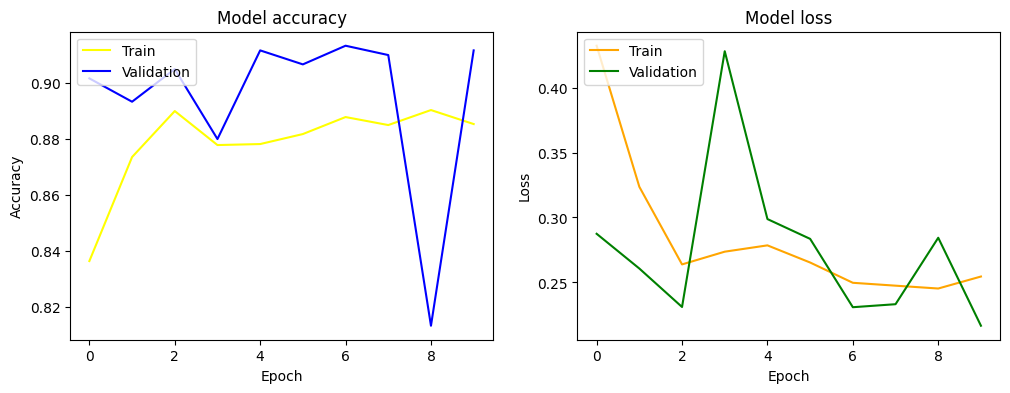

19/19 [==============================] - 0s 14ms/step - loss: 0.5218 - accuracy: 0.8450
Test loss: 0.5366615056991577
Test accuracy: 0.8349999785423279


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# computing the evaluation parameters
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot training & validation accuracy values
ax1.plot(history.history['accuracy'], color='yellow')
ax1.plot(history.history['val_accuracy'], color='blue')
ax1.set_title('Model accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
ax2.plot(history.history['loss'], color='orange')
ax2.plot(history.history['val_loss'], color='green')
ax2.set_title('Model loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validation'], loc='upper left')

plt.show()
model = tf.keras.models.load_model("mobilenet.h5")
test_loss, test_accuracy =  model.evaluate(x_preprocess_test, y_test)
val_loss, val_accuracy=model.evaluate(x_preprocess_val, y_valid)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

# Save the model
model.save("mobilenet.h5")



if google:
  from google.colab import files
  files.download("mobilenet.h5")
else:
    model.save("mobilenet.h5")



test_results={'model_path': "mobilenet.h5",
        'test_loss': test_loss,
        'test_accuracy': test_accuracy,
        'val_loss': val_loss,
        'val_accuracy': val_accuracy}

results.append(test_results)


In [ ]:
# importing the model
from tensorflow.keras.applications.xception import Xception, preprocess_input


In [ ]:
xception = Xception(weights='imagenet', include_top=False, input_shape = (100,100,3))
xception.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 49, 49, 32)   864         ['input_12[0][0]']               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 49, 49, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                           

In [ ]:
# making the model not trainable
xception.trainable = False

In [ ]:
# defining model architecture with case based layers at the end
model = tf.keras.Sequential([
    xception,
    GlobalAveragePooling2D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='sigmoid')
])

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 3, 3, 2048)        20861480  
                                                                 
 global_average_pooling2d_6   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_34 (Dense)            (None, 64)                131136    
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_35 (Dense)            (None, 4)                 260       
                                                                 
Total params: 20,992,876
Trainable params: 131,396
Non-trainable params: 20,861,480
___________________________________

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'], 
              optimizer="rmsprop")
model.fit(x_preprocess_train,y_train,
            batch_size=20,validation_data = (x_preprocess_val,y_valid),
            epochs=10)

Epoch 1/10
140/140 [==============================] - 8s 36ms/step - loss: 1.2052 - accuracy: 0.4604 - val_loss: 1.0821 - val_accuracy: 0.5700
Epoch 2/10
140/140 [==============================] - 3s 23ms/step - loss: 1.0440 - accuracy: 0.5743 - val_loss: 0.9413 - val_accuracy: 0.6367
Epoch 3/10
140/140 [==============================] - 3s 23ms/step - loss: 0.9431 - accuracy: 0.6168 - val_loss: 0.8666 - val_accuracy: 0.7183
Epoch 4/10
140/140 [==============================] - 3s 24ms/step - loss: 0.8658 - accuracy: 0.6664 - val_loss: 0.8390 - val_accuracy: 0.6583
Epoch 5/10
140/140 [==============================] - 3s 24ms/step - loss: 0.8084 - accuracy: 0.6814 - val_loss: 0.6904 - val_accuracy: 0.7700
Epoch 6/10
140/140 [==============================] - 3s 22ms/step - loss: 0.7507 - accuracy: 0.7068 - val_loss: 0.6620 - val_accuracy: 0.7717
Epoch 7/10
140/140 [==============================] - 3s 23ms/step - loss: 0.6908 - accuracy: 0.7314 - val_loss: 0.5927 - val_accuracy: 0.7983

In [ ]:
xception.trainable = True
# Freeze layers in the base model except the last one
for layer in xception.layers[:-1]:
    layer.trainable = False

In [ ]:
model = tf.keras.Sequential([
    xception,
    GlobalAveragePooling2D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='sigmoid')
])

model.summary(expand_nested=True)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 3, 3, 2048)        20861480  
|¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯|
| input_12 (InputLayer)     [(None, 100, 100, 3)]     0         |
|                                                               |
| block1_conv1 (Conv2D)     (None, 49, 49, 32)        864       |
|                                                               |
| block1_conv1_bn (BatchNorma  (None, 49, 49, 32)     128       |
| lization)                                                     |
|                                                               |
| block1_conv1_act (Activatio  (None, 49, 49, 32)     0         |
| n)                                                            |
|                                                               |
| block1_conv2 (Conv2D)     (None, 47, 47, 64)       

In [ ]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("xception.h5",save_best_only=True)

model.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'], 
              optimizer="rmsprop")
model.fit(x_preprocess_train,y_train,
            batch_size=20,validation_data = (x_preprocess_val,y_valid),
            epochs=10)

Epoch 1/10
140/140 [==============================] - 7s 34ms/step - loss: 1.2090 - accuracy: 0.4607 - val_loss: 1.0590 - val_accuracy: 0.5817
Epoch 2/10
140/140 [==============================] - 3s 23ms/step - loss: 1.0308 - accuracy: 0.5707 - val_loss: 0.9560 - val_accuracy: 0.6017
Epoch 3/10
140/140 [==============================] - 3s 22ms/step - loss: 0.9238 - accuracy: 0.6346 - val_loss: 0.8275 - val_accuracy: 0.7367
Epoch 4/10
140/140 [==============================] - 3s 23ms/step - loss: 0.8380 - accuracy: 0.6704 - val_loss: 0.7853 - val_accuracy: 0.7067
Epoch 5/10
140/140 [==============================] - 3s 24ms/step - loss: 0.7813 - accuracy: 0.7100 - val_loss: 0.6607 - val_accuracy: 0.7700
Epoch 6/10
140/140 [==============================] - 3s 23ms/step - loss: 0.7282 - accuracy: 0.7239 - val_loss: 0.6329 - val_accuracy: 0.7833
Epoch 7/10
140/140 [==============================] - 3s 23ms/step - loss: 0.6781 - accuracy: 0.7425 - val_loss: 0.5767 - val_accuracy: 0.8183

In [231]:
#computing evaluation parameters

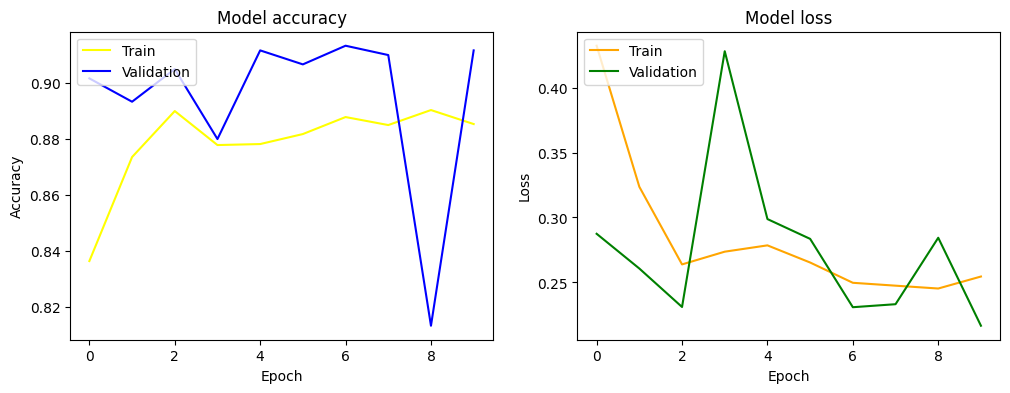

19/19 [==============================] - 0s 12ms/step - loss: 0.5218 - accuracy: 0.8450
Test loss: 0.5366615056991577
Test accuracy: 0.8349999785423279


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot training & validation accuracy values
ax1.plot(history.history['accuracy'], color='yellow')
ax1.plot(history.history['val_accuracy'], color='blue')
ax1.set_title('Model accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
ax2.plot(history.history['loss'], color='orange')
ax2.plot(history.history['val_loss'], color='green')
ax2.set_title('Model loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validation'], loc='upper left')

plt.show()
model = tf.keras.models.load_model("mobilenet.h5")
test_loss, test_accuracy =  model.evaluate(x_preprocess_test, y_test)
val_loss, val_accuracy=model.evaluate(x_preprocess_val, y_valid)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

# Save the model
model.save("xception.h5")



if google:
  from google.colab import files
  files.download("xception.h5")
else:
    model.save("xception.h5")



test_results={'model_path': "xception.h5",
        'test_loss': test_loss,
        'test_accuracy': test_accuracy,
        'val_loss': val_loss,
        'val_accuracy': val_accuracy}

results.append(test_results)


#### 9. Compare the models you have created so far and select the best model (making sure to justify this). Train that model on a combined training and validation set and evaluate it on your test set. Make sure to record your final test accuracy.

#### To compare between all the models, I have choosen to make a dataframe that records all the test and validation accuracy and losses in a dataframe that was sorted in descending order of test_accuracy. For my choice, I have to choose the model named "model_3conv_1.h5" which was based on the figure 12 in the paper that used the idead of adding one more convolutional layer along with a dropout layer to extend the concepts of figure 12. The individual layers are

1.Conv2D layer with 32 filters and kernel size of 3

2.Conv2D layer with 32 filters and kernel size of 3

3.Dropout layer with rate of 0.2: This layer randomly drops out 20% of the neurons in the previous layer during training, **which helps prevent overfitting**.

4.Conv2D layer with 16 filters, kernel size of 3, and ReLU activation: 

5.MaxPooling2D layer with pool size of 3

6. Flatten layer and Dense layer with a number of units equal to the number of categories and softmax activation. This layer is the fully connected neural network layer .

Reasons being:
1. test accuracy of both "model_3conv_1" and "model_combo_1" is comparable with 89.67% and 90.17% respectively.
2. But the number of parameter for "model_3conv_1" is 75,700 and for "model_combo_1" is 25,90,964. This clearly gives a huge computational advantage without sacrificing much of the accuracy as the "model_combo_1" has 34.22 times more parameter than my chosen model "model_3conv_1"..
3. From overall utility versus cost point of view, the chosen model clearly performs best as by the two instances shown in the table, the model performance is very stable too(test accuracy of 89.67% and 89.50%) 

In [ ]:

# combining all the results into a dataframe

df_results = pd.DataFrame(results, columns=['model_path', 'test_loss', 'test_accuracy', 'val_loss', 'val_accuracy'])
# sort by test accuracy in increasing order
df_results = df_results.sort_values(by='test_accuracy', ascending=False)

In [233]:
df_results

,model_path,test_loss,test_accuracy,val_loss,val_accuracy
1,model_combo_1.h5,0.229613,0.901667,0.266940,0.908333
3,model_3conv_1.h5,0.241706,0.896667,0.217300,0.910000
4,model_3conv_2.h5,0.234939,0.895000,0.216633,0.911667
5,model_3conv_2.h5,0.234939,0.895000,0.216633,0.911667
8,model_3conv_1.h5,0.243121,0.895000,0.222030,0.898235
0,onlydense.h5,0.249758,0.888333,0.249333,0.890000
6,mobilenet.h5,0.536662,0.835000,0.521826,0.845000
7,xception.h5,0.536662,0.835000,0.521826,0.845000
2,model_combo_LSTM.h5,0.670910,0.743333,0.679286,0.750000


In [232]:
df_results.to_csv("results", index=False)

In [ ]:
#as required by q9,combining the training and validation to train on the final choosen model

X_valid_t = np.concatenate((X_train, X_valid))
Y_valid_t = np.concatenate((Y_train, Y_valid))

print(X_valid_t.shape)
print(Y_valid_t.shape)

(3400, 100, 100, 1)
(3400,)


In [ ]:
np.random.seed(149)
tf.random.set_seed(149)


# Define batch size and buffer size for shuffling
batch_size = 32
buffer_size = len(X_valid)

val = tf.data.Dataset.from_tensor_slices((X_valid_t, Y_valid_t))
test = tf.data.Dataset.from_tensor_slices((X_test, Y_test))

# Shuffle and batch the datasets
val = val.shuffle(buffer_size=buffer_size)

val = val.batch(batch_size)
val = val.prefetch(tf.data.AUTOTUNE)

test = test.batch(batch_size)
test = test.prefetch(tf.data.AUTOTUNE)

In [234]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("Final_model_3conv_1.h5",save_best_only=True) 

# Training the model with train plus validation
history = model_3conv_1.fit(val,
                    epochs=10,
                    callbacks=[checkpoint_cb])

# Evaluate the model on test set

test_loss, test_accuracy = model_3conv_1.evaluate(test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)


Epoch 1/10
19/19 [==============================] - ETA: 0s - loss: 0.2300 - accuracy: 0.9050

19/19 [==============================] - 1s 44ms/step - loss: 0.2300 - accuracy: 0.9050
Epoch 2/10
19/19 [==============================] - ETA: 0s - loss: 0.2291 - accuracy: 0.9033

19/19 [==============================] - 0s 22ms/step - loss: 0.2291 - accuracy: 0.9033
Epoch 3/10
19/19 [==============================] - ETA: 0s - loss: 0.2138 - accuracy: 0.9117

19/19 [==============================] - 0s 22ms/step - loss: 0.2138 - accuracy: 0.9117
Epoch 4/10
19/19 [==============================] - ETA: 0s - loss: 0.2126 - accuracy: 0.9067

19/19 [==============================] - 0s 22ms/step - loss: 0.2126 - accuracy: 0.9067
Epoch 5/10
19/19 [==============================] - ETA: 0s - loss: 0.2056 - accuracy: 0.9150

19/19 [==============================] - 0s 22ms/step - loss: 0.2056 - accuracy: 0.9150
Epoch 6/10
19/19 [==============================] - ETA: 0s - loss: 0.2105 - accuracy: 0.9050

19/19 [==============================] - 0s 22ms/step - loss: 0.2105 - accuracy: 0.9050
Epoch 7/10
19/19 [==============================] - ETA: 0s - loss: 0.1982 - accuracy: 0.9167

19/19 [==============================] - 0s 22ms/step - loss: 0.1982 - accuracy: 0.9167
Epoch 8/10
19/19 [==============================] - ETA: 0s - loss: 0.1953 - accuracy: 0.9117

19/19 [==============================] - 0s 22ms/step - loss: 0.1953 - accuracy: 0.9117
Epoch 9/10
19/19 [==============================] - ETA: 0s - loss: 0.1973 - accuracy: 0.9117

19/19 [==============================] - 0s 21ms/step - loss: 0.1973 - accuracy: 0.9117
Epoch 10/10
19/19 [==============================] - ETA: 0s - loss: 0.1964 - accuracy: 0.9083

19/19 [==============================] - 0s 5ms/step - loss: 0.2557 - accuracy: 0.8983
Test loss: 0.25566041469573975
Test accuracy: 0.8983333110809326


#### Finally we get the choosen model accuracy as 89.83% on the test dataset